# Знакомство с классификационно-регрессионными деревьями  
CART -- Classification and Regression Trees (англ.) -- деревья принятия решений для классификации и регрессии  
В качестве набора данных используем "Ирисы Фишера".  
[Iris Data Set](https://synset.com/ai/ru/recognition/im/iris.png)

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

## Загрузка и подготовка данных

In [38]:
data = load_iris()

In [39]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df = df.rename(columns = {'sepal length (cm)' : 'sepal_length',
                          'sepal width (cm)'  : 'sepal_width',
                          'petal length (cm)' : 'petal_length',
                          'petal width (cm)'  : 'petal_width'})
df['species'] = data.target

In [40]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [41]:
X_train, X_test, y_train, y_test = \
train_test_split(df[['sepal_length', 'sepal_width',
                     'petal_length', 'petal_width']],
                 df['species'],
                 test_size = 0.3, random_state = 0)

In [42]:
X_train.shape

(105, 4)

In [43]:
X_test.shape

(45, 4)

In [44]:
y_train.shape

(105,)

In [45]:
y_test.shape

(45,)

## Этапы создания модели в sklearn

### Импорт модели

In [46]:
from sklearn.tree import DecisionTreeClassifier

### Инициализация модели (указание гиперпараметров модели)

In [47]:
# clf -- часто используемое сокращение для "classificator"
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

### Обучение модели

In [48]:
clf.fit(X_train.values, y_train)


DecisionTreeClassifier(max_depth=2, random_state=0)

### Использование модели для выполнения предсказаний (для классификации)

In [14]:
# "pred" stands for "predicted"
pred_1 = clf.predict(X_test.iloc[0].values.reshape(1, -1))
print(pred_1)

[2]


In [15]:
pred_10 = clf.predict(X_test[0:10].values)
print(pred_10)

[2 1 0 2 0 2 0 1 1 1]


## Визуализация дерева принятия решений

### Визуализация с помощью текста  
[visualizing](https://mljar.com/blog/visualize-decision-tree/)

In [16]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2



### Визуализация с помощью схемы

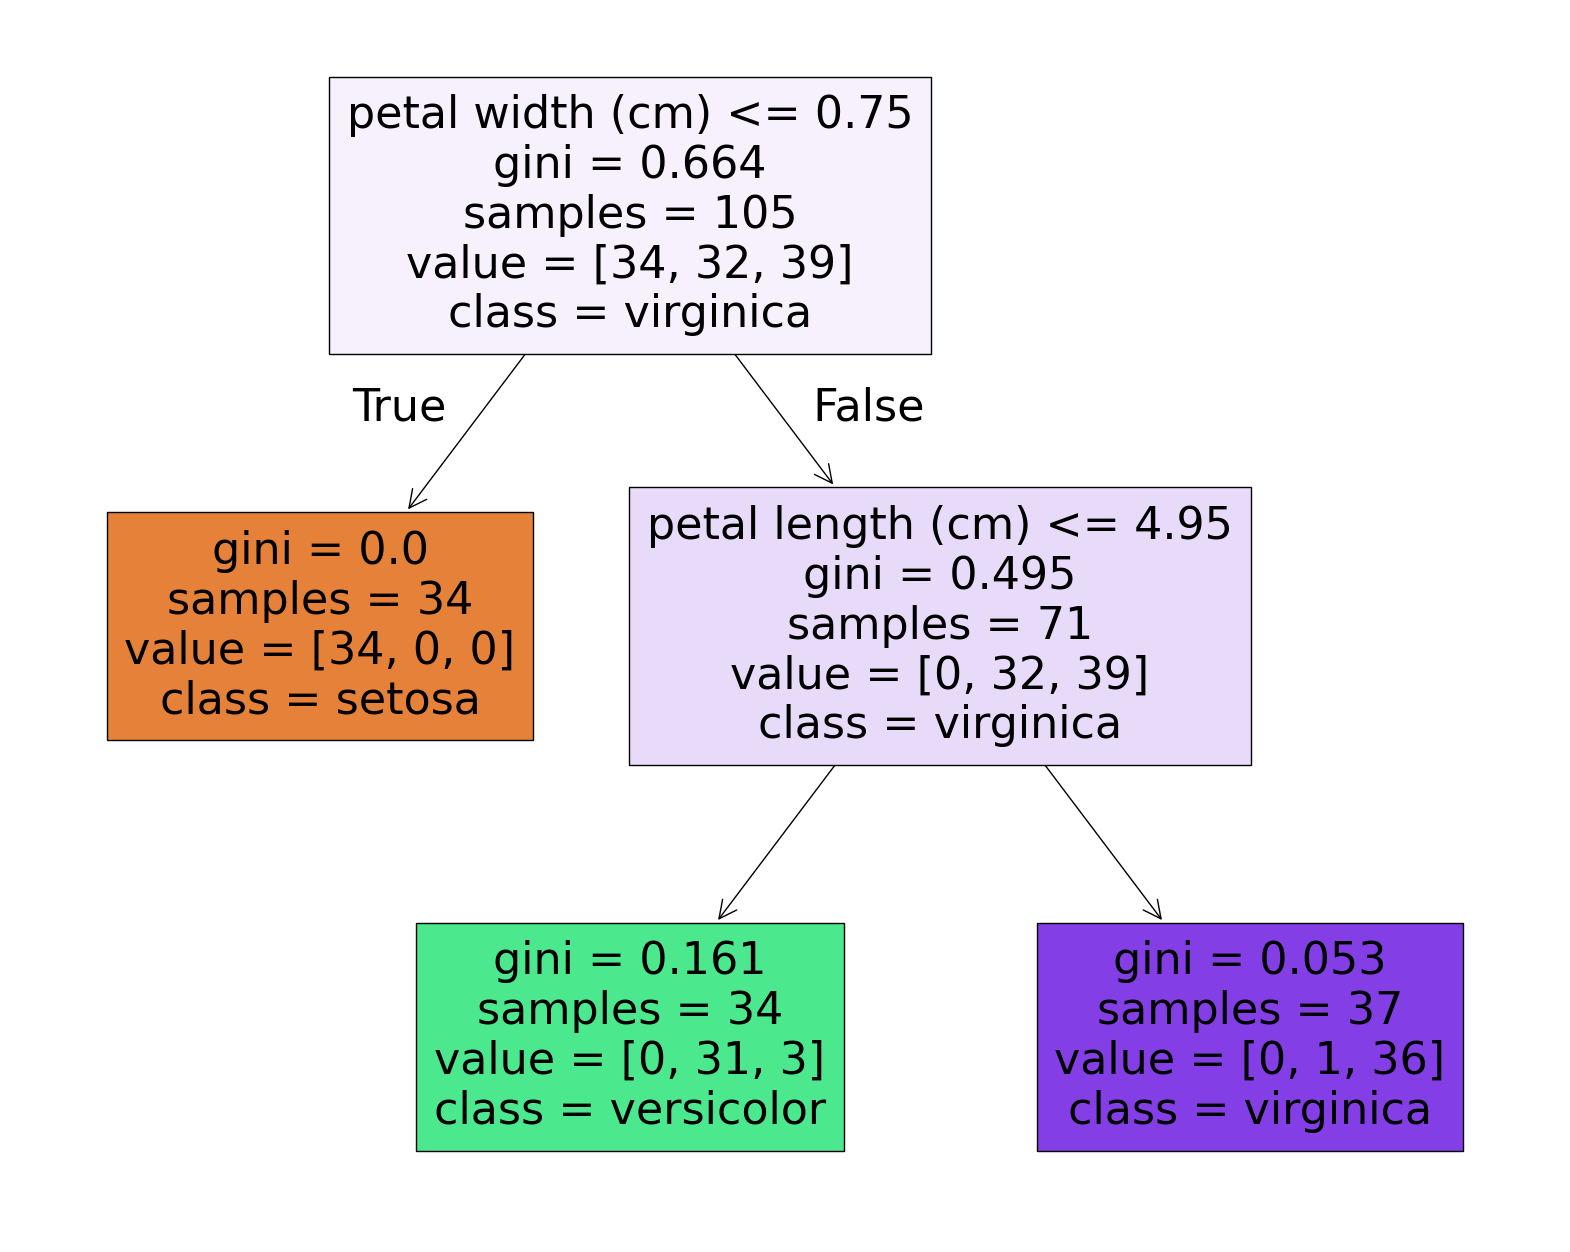

In [17]:
fig = plt.figure(figsize = (20,16))
_ = tree.plot_tree(clf,
                   feature_names = data.feature_names,
                   class_names = data.target_names,
                   filled=True)

### Визуализация с помощью пакета dtreeviz

In [18]:
!pip install graphviz

In [19]:
!pip install dtreeviz==1.4.0



In [20]:

import graphviz
import dtreeviz
import warnings
from dtreeviz.trees import dtreeviz

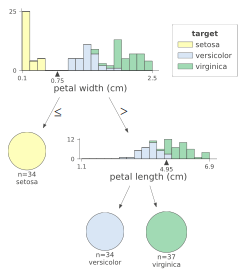

In [21]:
viz = dtreeviz(clf, X_train, y_train,
                target_name = "target",
                feature_names = data.feature_names,
                class_names = list(data.target_names))

viz

In [22]:
# Предсказанные значения
y_pred = clf.predict(X_test.values)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2 1 1 2 0 2 0 0]


In [23]:
# Действительные значения
print(y_test.values)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


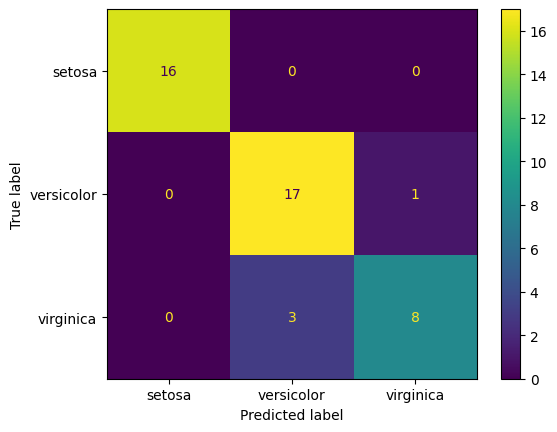

In [24]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = list(data.target_names))
cmd.plot()

In [30]:
f1_score = metrics.f1_score(y_test, y_pred, average = 'weighted')
print(f1_score)

0.9779434092477569


In [32]:
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [33]:
metrics.precision_score(y_test, y_pred, average = 'weighted')

0.9796296296296295

In [34]:
metrics.recall_score(y_test, y_pred, average = 'weighted')

0.9777777777777777

## Настройка гиперпараметров модели

In [49]:
max_depth_range = list(range(1, 11))
# List to store the accuracy for each value of max_depth:
f1_score = []
for depth in max_depth_range:

    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train.values, y_train)

    y_pred = clf.predict(X_test.values)

    score = metrics.f1_score(y_test, y_pred, average = 'macro')
    f1_score.append(score)

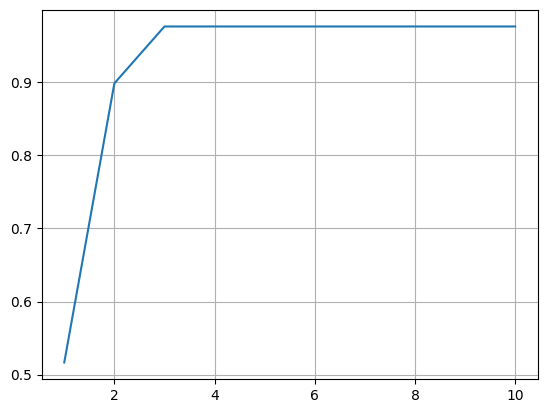

In [50]:
plt.plot(max_depth_range, f1_score)
plt.grid()
plt.show()

При значениях max_depth от 1 до 3 значение метрики F1-Score растет и при max_depth = 3 достигает максимального значения. Можно сделать вывод, что оптимальным значением гиперпараметра является 3.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
max_tree_num = list(range(10, 1010, 10))
# List to store the accuracy for each value of tree_num:
f1_score1 = []
for tree_num in max_tree_num:
    clf = RandomForestClassifier(n_estimators = tree_num, random_state=0)
    clf.fit(X_train.values, y_train)

    y_pred = clf.predict(X_test.values)

    score = metrics.f1_score(y_test, y_pred, average = 'weighted')
    f1_score1.append(score)

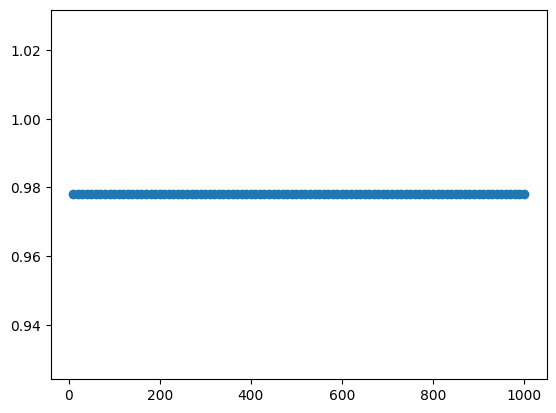

In [53]:
fig, ax = plt.subplots()
ax.scatter(x = max_tree_num, y = f1_score1)
plt.show()

Значение метрики F1-Score для моделей, содержащих от 10 до 1000 деревьев принятия решений с шагом 10, одинаково, следовательно, выбираем наименьшее значение гиперпараметра из данного диапазона, то есть 10.